In [74]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import json

In [75]:
no_null_crime_df = pd.read_csv("Raw_Data.zip/Raw_Data/Crime_Data_CPD.csv")

In [76]:
no_null_crime_df['District'] = no_null_crime_df['District'].replace(
   {1: "Central",
   2: "Wentworth",
   3: "Grand Crossing",
   4: "South Chicago",
   5: "Calumet",
   6: "Gresham",
   7: "Englewood",
   8: "Chicago Lawn",
   9: "Deering",
   10: "Ogden",
   11: "Harrison",
   12: "Near West",
   14: "Shakespeare",
   15: "Austin",
   16: "Jefferson Park",
   17: "Albany Park",
   18: "Near North",
   19: "Town Hall",
   20: "Lincoln",
   22: "Morgan Park",
   24: "Rogers Park",
   25: "Grand Central",
   31: "none"})

In [77]:
# Combining similar offenses together
no_null_crime_df["Primary Type"] = no_null_crime_df["Primary Type"].replace(
   {"MOTOR VEHICLE THEFT": "THEFT", "ROBBERY": "THEFT", "BURGLARY": "THEFT",
    "ASSAULT": "BATTERY", "OFFENSE INVOLVING CHILDREN": "BATTERY", "HOMICIDE": "BATTERY", "KIDNAPPING": "BATTERY",
    "ARSON": "CRIMINAL DAMAGE", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "WEAPONS VIOLATION": "CRIMINAL DAMAGE", "CONCEALED CARRY LICENSE VIOLATION": "CRIMINAL DAMAGE",
    "CRIM SEXUAL ASSAULT": "PUBLIC PEACE VIOLATION", "INTERFERENCE WITH PUBLIC OFFICER": "PUBLIC PEACE VIOLATION", "PUBLIC INDECENCY": "PUBLIC PEACE VIOLATION", "INTIMIDATION": "PUBLIC PEACE VIOLATION", "OBSCENITY": "PUBLIC PEACE VIOLATION", "STALKING": "PUBLIC PEACE VIOLATION", "LIQUOR LAW VIOLATION": "PUBLIC PEACE VIOLATION",
    "PROSTITUTION": "SEX OFFENSE", "HUMAN TRAFFICKING": "SEX OFFENSE",
    "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSE", "NON - CRIMINAL": "OTHER OFFENSE", "NON-CRIMINAL": "OTHER OFFENSE", "DECEPTIVE PRACTICE": "OTHER OFFENSE", "GAMBLING": "OTHER OFFENSE",
    "OTHER NARCOTIC VIOLATION": "NARCOTICS", })
no_null_crime_df.head()

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,Wentworth,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,OTHER OFFENSE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,Rogers Park,2,2017,42.012293,-87.699714
2,9/29/2017,6:45:00 PM,OTHER OFFENSE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,Grand Central,19,2017,41.938581,-87.765831
3,12/1/2017,6:20:00 AM,PUBLIC PEACE VIOLATION,AGGRAVATED: OTHER,STREET,True,False,Near West,24,2017,41.895805,-87.683159
4,6/8/2017,4:02:00 PM,CRIMINAL DAMAGE,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,Wentworth,40,2017,41.787427,-87.621759


In [78]:
crime_df_Ted = no_null_crime_df[["Date", "Time", "Year", "Arrest", "Primary Type"]]

crime_df_Ted["Day"] = crime_df_Ted["Date"].str[:-5]

crime_df_Ted_monthday = pd.DataFrame(crime_df_Ted.Day.str.split('/', 1).tolist(), columns = ["Month", "Day"])

crime_df_Ted["Month"] = crime_df_Ted_monthday["Month"]

crime_df_Ted["Day"] = crime_df_Ted_monthday["Day"]

crime_df_Ted = crime_df_Ted[["Month", "Day", "Year", "Time", "Primary Type", "Arrest"]]

crime_df_Ted['Month'] = crime_df_Ted['Month'].replace(
    {"1":"aJanuary", 
     "2":"bFebruary", 
     "3":"cMarch", 
     "4":"dApril", 
     "5":"eMay", 
     "6":"fJune", 
     "7":"gJuly", 
     "8":"hAugust", 
     "9":"iSeptember", 
     "10":"jOctober", 
     "11":"kNovember", 
     "12":"lDecemmber"})

crime_df_Ted["Day"] = crime_df_Ted["Day"].replace(
    {"1": 1,
     "2": 2,
     "3": 3,
     "4": 4,
     "5": 5,
     "6": 6,
     "7": 7,
     "8": 8,
     "9": 9,
     "10": 10,
     "11": 11,
     "12": 12,
     "13": 13,
     "14": 14,
     "15": 15,
     "16": 16,
     "17": 17,
     "18": 18,
     "19": 19,
     "20": 20,
     "21": 21,
     "22": 22,
     "23": 23,
     "24": 24,
     "25": 25,
     "26": 26,
     "27": 27,
     "28": 28,
     "29": 29,
     "30": 30,
     "31": 31})

crime_df_Ted

C:\Users\Ted Olson\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ted Olson\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Ted Olson\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Month,Day,Year,Time,Primary Type,Arrest
0,fJune,20,2016,9:00:00 AM,SEX OFFENSE,True
1,iSeptember,21,2017,12:15:00 AM,OTHER OFFENSE,True
2,iSeptember,29,2017,6:45:00 PM,OTHER OFFENSE,True
3,lDecemmber,1,2017,6:20:00 AM,PUBLIC PEACE VIOLATION,True
4,fJune,8,2017,4:02:00 PM,CRIMINAL DAMAGE,True
5,fJune,25,2017,7:00:00 PM,THEFT,True
6,iSeptember,6,2017,1:30:00 PM,THEFT,True
7,eMay,3,2016,9:08:00 PM,BATTERY,False
8,eMay,3,2016,2:00:00 PM,BATTERY,False
9,lDecemmber,8,2017,3:00:00 AM,CRIMINAL DAMAGE,False


In [79]:
crime_grouped1 = crime_df_Ted.groupby(["Month", "Primary Type"]).count()

# Reset index so Drug and Timepoint are columns again
crime_grouped1 = crime_grouped1.reset_index()
crime_grouped1.sort_index(inplace=True)
crime_grouped1

# Minor Data Munging to Re-Format the Data Frames
crime_grouped1 = crime_grouped1.pivot(index="Month", columns="Primary Type", values="Time")

crime_grouped1.sort_index(inplace=True)

crime_grouped1.head()

Primary Type,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,PUBLIC PEACE VIOLATION,SEX OFFENSE,THEFT
Month,,,,,,,
aJanuary,6272,3817,1258,3246,361,192,9424
bFebruary,6836,4074,1622,3701,423,180,9188
cMarch,10287,5921,2313,5032,677,228,12512
dApril,10574,6131,2252,5043,719,294,13068
eMay,12757,6958,2292,5246,795,279,15010


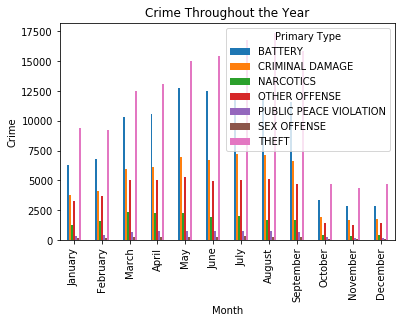

In [80]:


table = crime_grouped1.plot(kind="bar", title="Crime Throughout the Year")
table.set_xlabel("Month")
table.set_ylabel("Crime")
table.set_xticklabels(("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))
plt.show()

#crime_df_Ted.plot(x="Month", y=["2016", "2017"], kind="bar")
#plt.show()

In [81]:
crime_grouped2 = crime_df_Ted.groupby(["Primary Type", "Day"]).count()
# Reset index so Drug and Timepoint are columns again
crime_grouped2 = crime_grouped2.reset_index()

# Minor Data Munging to Re-Format the Data Frames
crime_grouped2 = crime_grouped2.pivot(index="Day", columns="Primary Type", values="Time")
crime_grouped2

Primary Type,BATTERY,CRIMINAL DAMAGE,NARCOTICS,OTHER OFFENSE,PUBLIC PEACE VIOLATION,SEX OFFENSE,THEFT
Day,,,,,,,
1,3946,2271,703,2456,307,146,5378
2,3845,2165,691,1721,269,79,5179
3,4038,2324,718,1839,238,103,5523
4,4164,2471,743,1789,257,76,5291
5,4110,2288,762,1877,270,86,5499
6,4045,2278,716,1835,230,76,5393
7,3830,2352,635,1763,258,64,5373
8,3914,2298,619,1730,292,85,5442
9,4041,2172,638,1809,258,100,5271


In [82]:
Theft = crime_df_Ted[crime_df_Ted["Primary Type"] == "THEFT"]
Theft.head()

,Month,Day,Year,Time,Primary Type,Arrest
5,fJune,25,2017,7:00:00 PM,THEFT,True
6,iSeptember,6,2017,1:30:00 PM,THEFT,True
11,iSeptember,9,2017,8:17:00 PM,THEFT,False
17,cMarch,28,2017,2:00:00 PM,THEFT,False
20,eMay,4,2016,12:00:00 PM,THEFT,False


In [83]:
crime_df_theft_new = Theft[["Day", "Primary Type"]]
crime_df_theft_new

district_groupbytheft_new = crime_df_theft_new.groupby(['Day']).count()
district_groupbytheft_new

,Primary Type
Day,
1,5378
2,5179
3,5523
4,5291
5,5499
6,5393
7,5373
8,5442
9,5271


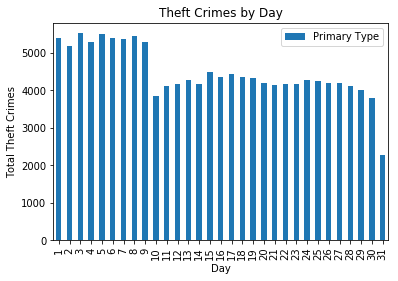

In [84]:
tabletheft = district_groupbytheft_new.plot(kind="bar", title="Theft Crimes by Day")
tabletheft.set_xlabel("Day")
tabletheft.set_ylabel("Total Theft Crimes")
plt.show()

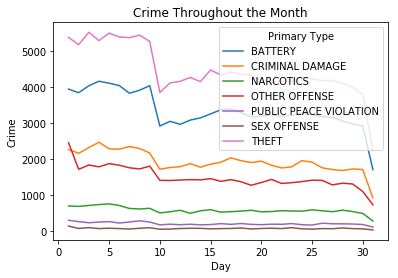

In [85]:
table2 = crime_grouped2.plot(kind="line", title="Crime Throughout the Month")
table2.set_xlabel("Day")
table2.set_ylabel("Crime")
plt.show()

In [105]:
# Anna's Code
#find the file, read it and then print it
file = ("Raw_Data.zip/Raw_Data/Crime_Data_CPD.csv")
crime = pd.read_csv(file, encoding="ISO-8859-1")

crime['District'] = crime['District'].replace(
  {1: "Central",
  2: "Wentworth",
  3: "Grand Crossing",
  4: "South Chicago",
  5: "Calumet",
  6: "Gresham",
  7: "Englewood",
  8: "Chicago Lawn",
  9: "Deering",
  10: "Ogden",
  11: "Harrison",
  12: "Near West",
  14: "Shakespeare",
  15: "Austin",
  16: "Jefferson Park",
  17: "Albany Park",
  18: "Near North",
  19: "Town Hall",
  20: "Lincoln",
  22: "Morgan Park",
  24: "Rogers Park",
  25: "Grand Central",
  31: "none"})

crime.head()

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,Wentworth,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,Rogers Park,2,2017,42.012293,-87.699714
2,9/29/2017,6:45:00 PM,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,Grand Central,19,2017,41.938581,-87.765831
3,12/1/2017,6:20:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,Near West,24,2017,41.895805,-87.683159
4,6/8/2017,4:02:00 PM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,Wentworth,40,2017,41.787427,-87.621759


In [106]:
# Anna's Code
no_null_crime_df1 = crime.dropna(how='any')

# Combining similar offenses together
no_null_crime_df1["Primary Type"] = no_null_crime_df1["Primary Type"].replace(
   {"MOTOR VEHICLE THEFT": "THEFT", "ROBBERY": "THEFT", "BURGLARY": "THEFT",
    "ASSAULT": "BATTERY", "OFFENSE INVOLVING CHILDREN": "BATTERY", "HOMICIDE": "BATTERY", "KIDNAPPING": "BATTERY",
    "ARSON": "CRIMINAL DAMAGE", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "WEAPONS VIOLATION": "CRIMINAL DAMAGE", "CONCEALED CARRY LICENSE VIOLATION": "CRIMINAL DAMAGE",
    "CRIM SEXUAL ASSAULT": "PUBLIC PEACE VIOLATION", "INTERFERENCE WITH PUBLIC OFFICER": "PUBLIC PEACE VIOLATION", "PUBLIC INDECENCY": "PUBLIC PEACE VIOLATION", "INTIMIDATION": "PUBLIC PEACE VIOLATION", "OBSCENITY": "PUBLIC PEACE VIOLATION", "STALKING": "PUBLIC PEACE VIOLATION", "LIQUOR LAW VIOLATION": "PUBLIC PEACE VIOLATION",
    "PROSTITUTION": "SEX OFFENSE", "HUMAN TRAFFICKING": "SEX OFFENSE",
    "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSE", "NON - CRIMINAL": "OTHER OFFENSE", "NON-CRIMINAL": "OTHER OFFENSE", "DECEPTIVE PRACTICE": "OTHER OFFENSE", "GAMBLING": "OTHER OFFENSE",
    "OTHER NARCOTIC VIOLATION": "NARCOTICS", })
no_null_crime_df1

C:\Users\Ted Olson\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,Wentworth,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,OTHER OFFENSE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,Rogers Park,2,2017,42.012293,-87.699714
2,9/29/2017,6:45:00 PM,OTHER OFFENSE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,Grand Central,19,2017,41.938581,-87.765831
3,12/1/2017,6:20:00 AM,PUBLIC PEACE VIOLATION,AGGRAVATED: OTHER,STREET,True,False,Near West,24,2017,41.895805,-87.683159
4,6/8/2017,4:02:00 PM,CRIMINAL DAMAGE,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,Wentworth,40,2017,41.787427,-87.621759
5,6/25/2017,7:00:00 PM,THEFT,ARMED: HANDGUN,SMALL RETAIL STORE,True,False,Calumet,49,2017,41.707062,-87.631483
6,9/6/2017,1:30:00 PM,THEFT,OVER $500,OTHER,True,False,Ogden,30,2017,41.844510,-87.705519
7,5/3/2016,9:08:00 PM,BATTERY,FIRST DEGREE MURDER,STREET,False,False,Chicago Lawn,66,2016,41.758606,-87.686749
8,5/3/2016,2:00:00 PM,BATTERY,FIRST DEGREE MURDER,STREET,False,False,Austin,25,2016,41.879467,-87.748196
9,12/8/2017,3:00:00 AM,CRIMINAL DAMAGE,BY FIRE,"SCHOOL, PRIVATE, BUILDING",False,False,Ogden,30,2017,41.832571,-87.704686


In [107]:
#Anna's code
type_count = no_null_crime_df["Primary Type"].value_counts()
type_count

THEFT                     138474
BATTERY                   103968
CRIMINAL DAMAGE            59988
OTHER OFFENSE              46323
NARCOTICS                  18169
PUBLIC PEACE VIOLATION      6619
SEX OFFENSE                 2456
Name: Primary Type, dtype: int64

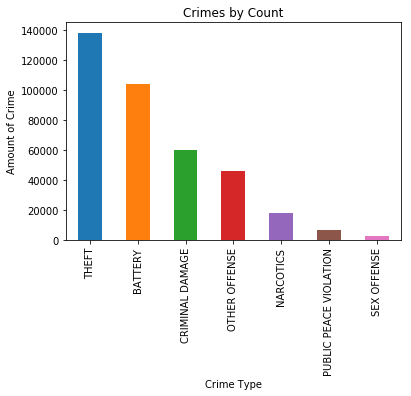

In [108]:
# Chart the top 10 crimes, give it a title, and label the axes
top_ten_table = type_count.plot(kind="bar", title="Crimes by Count")
top_ten_table.set_xlabel("Crime Type")
top_ten_table.set_ylabel("Amount of Crime")

plt.show()

In [109]:
#how many of each crime
arrest_count = no_null_crime_df["Arrest"].value_counts()
arrest_count

False    299990
True      76007
Name: Arrest, dtype: int64

In [110]:
arrests = no_null_crime_df[no_null_crime_df.Arrest == True]
arrests.head()

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,Wentworth,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,OTHER OFFENSE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,Rogers Park,2,2017,42.012293,-87.699714
2,9/29/2017,6:45:00 PM,OTHER OFFENSE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,Grand Central,19,2017,41.938581,-87.765831
3,12/1/2017,6:20:00 AM,PUBLIC PEACE VIOLATION,AGGRAVATED: OTHER,STREET,True,False,Near West,24,2017,41.895805,-87.683159
4,6/8/2017,4:02:00 PM,CRIMINAL DAMAGE,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,Wentworth,40,2017,41.787427,-87.621759


In [111]:
no_arrest = no_null_crime_df[no_null_crime_df.Arrest == False]
no_arrest.head()

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
7,5/3/2016,9:08:00 PM,BATTERY,FIRST DEGREE MURDER,STREET,False,False,Chicago Lawn,66,2016,41.758606,-87.686749
8,5/3/2016,2:00:00 PM,BATTERY,FIRST DEGREE MURDER,STREET,False,False,Austin,25,2016,41.879467,-87.748196
9,12/8/2017,3:00:00 AM,CRIMINAL DAMAGE,BY FIRE,"SCHOOL, PRIVATE, BUILDING",False,False,Ogden,30,2017,41.832571,-87.704686
10,10/8/2017,3:00:00 AM,PUBLIC PEACE VIOLATION,NON-AGGRAVATED,RESIDENCE,False,False,Morgan Park,73,2017,NaN,NaN
11,9/9/2017,8:17:00 PM,THEFT,OVER $500,RESIDENCE,False,False,Grand Crossing,42,2017,NaN,NaN


In [113]:
crime_grouped = no_null_crime_df1.groupby(["Primary Type", "Arrest"]).count()

# Reset index so Drug and Timepoint are columns again
crime_grouped = crime_grouped.reset_index()

# Minor Data Munging to Re-Format the Data Frames
crime_grouped = crime_grouped.pivot(index="Primary Type", columns="Arrest", values="Date")
crime_grouped.head(10)

Arrest,False,True
Primary Type,,
BATTERY,83128,20696
CRIMINAL DAMAGE,47042,12916
NARCOTICS,10,18113
OTHER OFFENSE,38224,6527
PUBLIC PEACE VIOLATION,2950,3606
SEX OFFENSE,1008,1404
THEFT,125603,12650


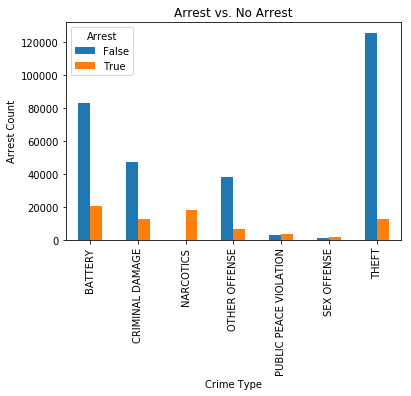

In [114]:
table1 = crime_grouped.plot(kind="bar", title="Arrest vs. No Arrest")
table1.set_xlabel("Crime Type")
table1.set_ylabel("Arrest Count")
plt.show()

In [116]:
csv = "Raw_Data.zip/Raw_Data/Crime_Data_CPD.csv"
crime_df = pd.read_csv(csv)

In [117]:
crime_df = crime_df.dropna(how="any")
crime_df.head()

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,2,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,24,2,2017,42.012293,-87.699714
2,9/29/2017,6:45:00 PM,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,25,19,2017,41.938581,-87.765831
3,12/1/2017,6:20:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,12,24,2017,41.895805,-87.683159
4,6/8/2017,4:02:00 PM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,2,40,2017,41.787427,-87.621759


In [118]:
crime_df['District'] = crime_df['District'].replace(
  {1: "Central",
  2: "Wentworth",
  3: "Grand Crossing",
  4: "South Chicago",
  5: "Calumet",
  6: "Gresham",
  7: "Englewood",
  8: "Chicago Lawn",
  9: "Deering",
  10: "Ogden",
  11: "Harrison",
  12: "Near West",
  14: "Shakespeare",
  15: "Austin",
  16: "Jefferson Park",
  17: "Albany Park",
  18: "Near North",
  19: "Town Hall",
  20: "Lincoln",
  22: "Morgan Park",
  24: "Rogers Park",
  25: "Grand Central",
  31: "none"})

crime_df.head()

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,Wentworth,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,Rogers Park,2,2017,42.012293,-87.699714
2,9/29/2017,6:45:00 PM,DECEPTIVE PRACTICE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,Grand Central,19,2017,41.938581,-87.765831
3,12/1/2017,6:20:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,STREET,True,False,Near West,24,2017,41.895805,-87.683159
4,6/8/2017,4:02:00 PM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,Wentworth,40,2017,41.787427,-87.621759


In [119]:
# Combining similar offenses together
crime_df["Primary Type"] = crime_df["Primary Type"].replace(
  {"MOTOR VEHICLE THEFT": "THEFT", "ROBBERY": "THEFT", "BURGLARY": "THEFT",
   "ASSAULT": "BATTERY", "OFFENSE INVOLVING CHILDREN": "BATTERY", "HOMICIDE": "BATTERY", "KIDNAPPING": "BATTERY",
   "ARSON": "CRIMINAL DAMAGE", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "WEAPONS VIOLATION": "CRIMINAL DAMAGE", "CONCEALED CARRY LICENSE VIOLATION": "CRIMINAL DAMAGE",
   "CRIM SEXUAL ASSAULT": "PUBLIC PEACE VIOLATION", "INTERFERENCE WITH PUBLIC OFFICER": "PUBLIC PEACE VIOLATION", "PUBLIC INDECENCY": "PUBLIC PEACE VIOLATION", "INTIMIDATION": "PUBLIC PEACE VIOLATION", "OBSCENITY": "PUBLIC PEACE VIOLATION", "STALKING": "PUBLIC PEACE VIOLATION", "LIQUOR LAW VIOLATION": "PUBLIC PEACE VIOLATION",
   "PROSTITUTION": "SEX OFFENSE", "HUMAN TRAFFICKING": "SEX OFFENSE",
   "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSE", "NON - CRIMINAL": "OTHER OFFENSE", "NON-CRIMINAL": "OTHER OFFENSE", "DECEPTIVE PRACTICE": "OTHER OFFENSE", "GAMBLING": "OTHER OFFENSE",
   "OTHER NARCOTIC VIOLATION": "NARCOTICS", })
crime_df.head(20)

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,Wentworth,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,OTHER OFFENSE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,Rogers Park,2,2017,42.012293,-87.699714
2,9/29/2017,6:45:00 PM,OTHER OFFENSE,BOGUS CHECK,CURRENCY EXCHANGE,True,False,Grand Central,19,2017,41.938581,-87.765831
3,12/1/2017,6:20:00 AM,PUBLIC PEACE VIOLATION,AGGRAVATED: OTHER,STREET,True,False,Near West,24,2017,41.895805,-87.683159
4,6/8/2017,4:02:00 PM,CRIMINAL DAMAGE,UNLAWFUL POSS OF HANDGUN,ALLEY,True,False,Wentworth,40,2017,41.787427,-87.621759
5,6/25/2017,7:00:00 PM,THEFT,ARMED: HANDGUN,SMALL RETAIL STORE,True,False,Calumet,49,2017,41.707062,-87.631483
6,9/6/2017,1:30:00 PM,THEFT,OVER $500,OTHER,True,False,Ogden,30,2017,41.844510,-87.705519
7,5/3/2016,9:08:00 PM,BATTERY,FIRST DEGREE MURDER,STREET,False,False,Chicago Lawn,66,2016,41.758606,-87.686749
8,5/3/2016,2:00:00 PM,BATTERY,FIRST DEGREE MURDER,STREET,False,False,Austin,25,2016,41.879467,-87.748196
9,12/8/2017,3:00:00 AM,CRIMINAL DAMAGE,BY FIRE,"SCHOOL, PRIVATE, BUILDING",False,False,Ogden,30,2017,41.832571,-87.704686


In [ ]:
#Renaming similar Location Descriptions into one description name
crime_df["Location Description"] = crime_df["Location Description"].replace({"SMALL RETAIL STORE": "Private/Retail",
                                           "BAR OR TAVERN": "Private/Retail",
                                           "HOTEL/MOTEL": "Private/Retail",
                                           "GAS STATION": "Private/Retail",
                                           "RESTAURANT": "Private/Retail",
                                           "TAVERN/LIQUOR STORE": "Private/Retail",
                                           "GROCERY FOOD STORE": "Private/Retail",
                                           "COMMERCIAL / BUSINESS OFFICE": "Private/Retail",
                                           "NURSING HOME/RETIREMENT HOME": "Private/Retail",
                                           "CONVENIENCE STORE": "Private/Retail",
                                           "DEPARTMENT STORE": "Private/Retail",
                                           "DRUG STORE": "Private/Retail",
                                           "BARBER SHOP/BEAUTY SALON": "Private/Retail",
                                           "BARBERSHOP": "Private/Retail",
                                           "ATHLETIC CLUB": "Private/Retail",
                                           "MOVIE HOUSE/THEATER": "Private/Retail",
                                           "CLEANING STORE": "Private/Retail",
                                           "MEDICAL/DENTAL OFFICE": "Private/Retail",
                                           "DAY CARE CENTER": "Private/Retail",
                                           "APPLIANCE STORE": "Private/Retail",
                                           "CAR WASH": "Private/Retail",
                                           "BOWLING ALLEY": "Private/Retail",
                                           "PAWN SHOP": "Private/Retail",
                                           "AUTO / BOAT / RV DEALERSHIP": "Private/Retail",
                                           "ANIMAL HOSPITAL": "Private/Retail",
                                           "BANK": "Private/Retail",
                                           "CHURCH/SYNAGOGUE/PLACE OF WORSHIP": "Private/Retail",
                                           "CREDIT UNION": "Private/Retail",
                                           "SAVINGS AND LOAN": "Private/Retail",
                                           "WAREHOUSE": "Private/Retail",
                                           "FACTORY/MANUFACTURING BUILDING": "Private/Retail",
                                           "HOSPITAL BUILDING/GROUNDS": "Private/Retail",
                                           "CONSTRUCTION SITE": "Private/Retail",
                                           "ATM (AUTOMATIC TELLER MACHINE)": "Private/Retail"
                                           })
crime_df["Location Description"] = crime_df["Location Description"].replace({"APARTMENT": "Residential",
                                           "RESIDENCE": "Residential",
                                           "RESIDENCE PORCH/HALLWAY": "Residential",
                                           "RESIDENCE-GARAGE": "Residential",
                                           "DRIVEWAY - RESIDENTIAL": "Residential",
                                           "RESIDENTIAL YARD (FRONT/BACK)": "Residential",
                                           "HOUSE": "Residential",
                                           "PORCH": "Residential",
                                           "YARD": "Residential"
                                           })
crime_df["Location Description"] = crime_df["Location Description"].replace({"STREET": "Street/Sidewalk",
                                           "ALLEY": "Street/Sidewalk",
                                           "SIDEWALK": "Street/Sidewalk",
                                           "BRIDGE": "Street/Sidewalk",
                                           "HIGHWAY/EXPRESSWAY": "Street/Sidewalk"
                                           })

crime_df["Location Description"] = crime_df["Location Description"].replace({"TAXICAB": "Vehicle",
                                           "OTHER COMMERCIAL TRANSPORTATION": "Vehicle",
                                           "VEHICLE - DELIVERY TRUCK": "Vehicle",
                                           "VEHICLE - OTHER RIDE SERVICE": "Vehicle",
                                           "VEHICLE-COMMERCIAL": "Vehicle",
                                           "VEHICLE NON-COMMERCIAL": "Vehicle",
                                           "CTA TRAIN": "Vehicle",
                                           "CTA BUS": "Vehicle",
                                           "AUTO": "Vehicle",
                                           "VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)": "Vehicle"})
crime_df["Location Description"] = crime_df["Location Description"].replace({"CEMETARY": "Public",
                                           "LAKEFRONT/WATERFRONT/RIVERBANK": "Public",
                                           "FOREST PRESERVE": "Public",
                                           "PARK PROPERTY": "Public",
                                           "VACANT LOT/LAND": "Public",
                                           "PARKING LOT/GARAGE(NON.RESID.)": "Public",
                                           "CTA TRACKS - RIGHT OF WAY": "Public",
                                           "CTA BUS STOP": "Public",
                                           "CTA PLATFORM": "Public",
                                           "LAGOON": "Public",
                                           "COLLEGE/UNIVERSITY RESIDENCE HALL": "Public",
                                           "COLLEGE/UNIVERSITY GROUNDS": "Public",
                                           "SCHOOL, PRIVATE, GROUNDS": "Public",
                                           "SCHOOL, PUBLIC, BUILDING": "Public",
                                           "SCHOOL, PRIVATE, BUILDING": "Public",
                                           "SCHOOL, PUBLIC, GROUNDS": "Public",
                                           "FEDERAL BUILDING": "Public",
                                           "GOVERNMENT BUILDING/PROPERTY": "Public",
                                           "FIRE STATION": "Public",
                                           "POLICE FACILITY/VEH PARKING LOT": "Public",
                                           "JAIL / LOCK-UP FACILITY": "Public",
                                           "LIBRARY": "Public",
                                           "SPORTS ARENA/STADIUM": "Public",
                                           "CTA STATION": "Public",
                                           "CTA GARAGE / OTHER PROPERTY": "Public",
                                           "CHA APARTMENT": "Public",
                                           "CHA PARKING LOT/GROUNDS": "Public",
                                           "CHA PARKING LOT": "Public",
                                           "CHA HALLWAY/STAIRWELL/ELEVATOR": "Public",
                                           "PARKING LOT": "Public"})
crime_df["Location Description"] = crime_df["Location Description"].replace({"AIRCRAFT": "Other",
                                           "AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA": "Other",
                                           "AIRPORT BUILDING NON-TERMINAL - SECURE AREA": "Other",
                                           "AIRPORT EXTERIOR - NON-SECURE AREA": "Other",
                                           "AIRPORT EXTERIOR - SECURE AREA": "Other",
                                           "AIRPORT PARKING LOT": "Other",
                                           "AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA": "Other",
                                           "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA": "Other",
                                           "AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA": "Other",
                                           "AIRPORT TERMINAL UPPER LEVEL - SECURE AREA": "Other",
                                           "AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA": "Other",
                                           "AIRPORT TRANSPORTATION SYSTEM (ATS)": "Other",
                                           "AIRPORT VENDING ESTABLISHMENT": "Other",
                                           "AIRPORT/AIRCRAFT": "Other",
                                           "OTHER": "Other",
                                           "ABANDONED BUILDING": "Other",
                                           "COIN OPERATED MACHINE": "Other",
                                           "BOAT/WATERCRAFT": "Other",
                                           "CURRENCY EXCHANGE": "Other",
                                           "NEWSSTAND": "Other",
                                           "OTHER RAILROAD PROP / TRAIN DEPOT": "Other",
                                           "POOL ROOM": "Other",
                                           "GANGWAY": "Other"})

### Question:
### What types of locations did most crimes occur in Chicago from 2016-2017, and does the location type have an impact on the amount of crime in a district?

In [121]:
# Create dataframe groupbed by Location Description and find count of each description
loc_count = crime_df.groupby(crime_df["Location Description"]).count()
loc_count

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
Location Description,,,,,,,,,,,,
Other,18039,18039,18039,18039,18039,18039,18039,18039,18039,18039,18039,18039
Private/Retail,53398,53398,53398,53398,53398,53398,53398,53398,53398,53398,53398,53398
Public,32700,32700,32700,32700,32700,32700,32700,32700,32700,32700,32700,32700
Residential,130426,130426,130426,130426,130426,130426,130426,130426,130426,130426,130426,130426
Street/Sidewalk,127805,127805,127805,127805,127805,127805,127805,127805,127805,127805,127805,127805
Vehicle,11509,11509,11509,11509,11509,11509,11509,11509,11509,11509,11509,11509


In [122]:
#Create dataframe for count of Thefts by location type.
theft_df = crime_df.loc[(crime_df["Primary Type"] == "THEFT")]
theft_locations = theft_df.groupby(theft_df["Location Description"]).count()
theft_locations

,Date,Time,Primary Type,Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
Location Description,,,,,,,,,,,
Other,6892,6892,6892,6892,6892,6892,6892,6892,6892,6892,6892
Private/Retail,29967,29967,29967,29967,29967,29967,29967,29967,29967,29967,29967
Public,11655,11655,11655,11655,11655,11655,11655,11655,11655,11655,11655
Residential,35119,35119,35119,35119,35119,35119,35119,35119,35119,35119,35119
Street/Sidewalk,49394,49394,49394,49394,49394,49394,49394,49394,49394,49394,49394
Vehicle,5226,5226,5226,5226,5226,5226,5226,5226,5226,5226,5226


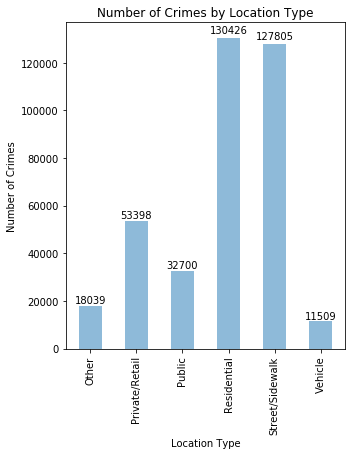

<Figure size 432x288 with 0 Axes>

In [123]:
# Plot bar chart for # of crimes by location type
plt.figure(figsize=(5,6))
rects1 = plt.bar(loc_count.index, loc_count["Primary Type"], width=.50, alpha=0.5, align="center")

# Adding labels to the chart
plt.title("Number of Crimes by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Number of Crimes")

plt.xticks(rotation=90)


# Attach a text label above each bar displaying its value
def autolabel(rects):
    for rect in rects:
       height = rect.get_height()
       plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
               '%d' % int(height),
               ha='center', va='bottom')

autolabel(rects1)

# Display Bar Chart
plt.show()

plt.savefig('CrimebyLocationType.png')

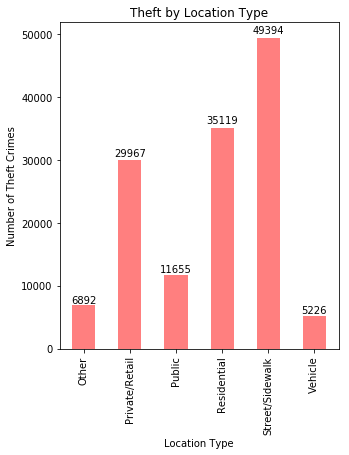

<Figure size 432x288 with 0 Axes>

In [124]:
# Plot bar chart for # of crimes by location type
plt.figure(figsize=(5,6))
rects2 = plt.bar(theft_locations.index, theft_locations["Primary Type"], width=.50, color="r", alpha=0.5, align="center")

# Adding labels to the chart
plt.title("Theft by Location Type")
plt.xlabel("Location Type")
plt.ylabel("Number of Theft Crimes")

plt.xticks(rotation=90)

# Attach a text label above each bar displaying its value
def autolabel(rects):
    for rect in rects:
       height = rect.get_height()
       plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
               '%d' % int(height),
               ha='center', va='bottom')

autolabel(rects2)

# Display Bar Chart
plt.show()

plt.savefig('TheftbyLocationType.png')

In [125]:
highestdist_df = theft_df.loc[(theft_df["District"] == "Central")]
highestdist = highestdist_df.groupby(highestdist_df["Location Description"]).count()
highestdist

,Date,Time,Primary Type,Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
Location Description,,,,,,,,,,,
Other,950,950,950,950,950,950,950,950,950,950,950
Private/Retail,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414,5414
Public,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687,1687
Residential,446,446,446,446,446,446,446,446,446,446,446
Street/Sidewalk,2248,2248,2248,2248,2248,2248,2248,2248,2248,2248,2248
Vehicle,689,689,689,689,689,689,689,689,689,689,689


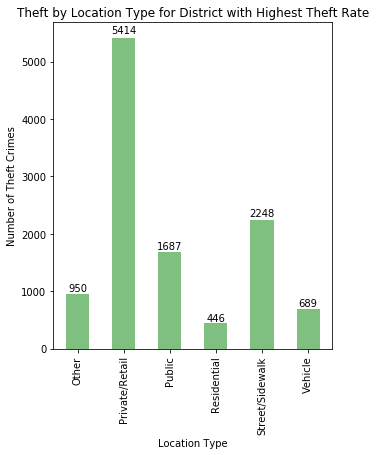

<Figure size 432x288 with 0 Axes>

In [126]:
# Plot bar chart for # of crimes by location type
plt.figure(figsize=(5,6))
rects3 = plt.bar(highestdist.index, highestdist["Primary Type"], width=.50, color="g", alpha=0.5, align="center")

# Adding labels to the chart
plt.title("Theft by Location Type for District with Highest Theft Rate")
plt.xlabel("Location Type")
plt.ylabel("Number of Theft Crimes")

plt.xticks(rotation=90)

# Attach a text label above each bar displaying its value
def autolabel(rects):
    for rect in rects:
       height = rect.get_height()
       plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
               '%d' % int(height),
               ha='center', va='bottom')

autolabel(rects3)

# Display Bar Chart
plt.show()

plt.savefig('highestdistrictheft.png')

In [127]:
lowestdist_df = theft_df.loc[(theft_df["District"] == "Lincoln")]
lowestdist = lowestdist_df.groupby(lowestdist_df["Location Description"]).count()
lowestdist

,Date,Time,Primary Type,Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
Location Description,,,,,,,,,,,
Other,147,147,147,147,147,147,147,147,147,147,147
Private/Retail,626,626,626,626,626,626,626,626,626,626,626
Public,169,169,169,169,169,169,169,169,169,169,169
Residential,691,691,691,691,691,691,691,691,691,691,691
Street/Sidewalk,734,734,734,734,734,734,734,734,734,734,734
Vehicle,85,85,85,85,85,85,85,85,85,85,85


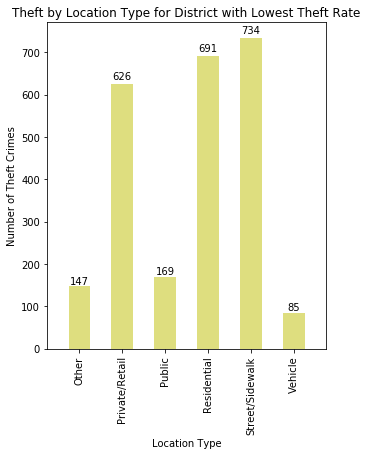

<Figure size 432x288 with 0 Axes>

In [128]:
# Plot bar chart for # of crimes by location type
plt.figure(figsize=(5,6))
rects4 = plt.bar(lowestdist.index, lowestdist["Primary Type"], width=.50, color="y", alpha=0.5, align="center")

# Adding labels to the chart
plt.title("Theft by Location Type for District with Lowest Theft Rate")
plt.xlabel("Location Type")
plt.ylabel("Number of Theft Crimes")

plt.xlim(-0.75, len(lowestdist.index)-0.25)

plt.xticks(rotation=90)

# Attach a text label above each bar displaying its value
def autolabel(rects):
    for rect in rects:
       height = rect.get_height()
       plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
               '%d' % int(height),
               ha='center', va='bottom')

autolabel(rects4)

# Display Bar Chart
plt.show()

plt.savefig('LowestDistricTheft.png')

## Analysis:

Most crimes in Chicago either happen on the streets and sidewalks or in residential homes. Thefts happen more on the streets and sidewalks compared to residential homes. The district with the highest theft rate has a majority of those thefts occurring in retail/private buildings whereas the district with the lowest theft rate has most of it's thefts happening in residential and streets/sidewalks.

I can assume the district with the highest theft rate is a more commercial/urban area, while the district with the lowest theft rate is more residential area.

In [147]:
!pip install stats

  Running setup.py bdist_wheel for stats: started
  Running setup.py bdist_wheel for stats: finished with status 'done'
  Stored in directory: C:\Users\Ted Olson\AppData\Local\pip\Cache\wheels\1f\64\c9\da1748f4ce76935afc665178ead2217b90147bac5ca096aa56
Successfully built stats


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [148]:
# Import Dependencies
import gmaps
import numpy as np
import requests
import time
#from us import states
from config_g import gkey
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'config_g'

In [149]:
#read into the csv
crime_df = pd.read_csv("Raw_Data.zip/Raw_Data/Crime_Data_CPD.csv")
crime_df.head(1)

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,2,38,2016,41.808541,-87.621195


In [150]:
# drop NAN
crime_df = crime_df.dropna(how='any')
crime_df.head(1)

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,2,38,2016,41.808541,-87.621195


In [151]:
# convert districts from numbers to names
crime_df['District'] = crime_df['District'].replace(
   {1: "Central", 2: "Wentworth", 3: "Grand Crossing", 4: "South Chicago", 5: "Calumet", 6: "Gresham", 7: "Englewood",
    8: "Chicago Lawn", 9: "Deering", 10: "Ogden", 11: "Harrison", 12: "Near West", 14: "Shakespeare", 15: "Austin",
    16: "Jefferson Park", 17: "Albany Park", 18: "Near North", 19: "Town Hall", 20: "Lincoln", 22: "Morgan Park",
    24: "Rogers Park", 25: "Grand Central", 31: "none"})
crime_df.head(2)

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,Wentworth,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,DECEPTIVE PRACTICE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,Rogers Park,2,2017,42.012293,-87.699714


In [152]:
# Combining similar offenses together
crime_df["Primary Type"] = crime_df["Primary Type"].replace(
  {"MOTOR VEHICLE THEFT": "THEFT", "ROBBERY": "THEFT", "BURGLARY": "THEFT",
   "ASSAULT": "BATTERY", "OFFENSE INVOLVING CHILDREN": "BATTERY", "HOMICIDE": "BATTERY", "KIDNAPPING": "BATTERY",
   "ARSON": "CRIMINAL DAMAGE", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "WEAPONS VIOLATION": "CRIMINAL DAMAGE", "CONCEALED CARRY LICENSE VIOLATION": "CRIMINAL DAMAGE",
   "CRIM SEXUAL ASSAULT": "PUBLIC PEACE VIOLATION", "INTERFERENCE WITH PUBLIC OFFICER": "PUBLIC PEACE VIOLATION", "PUBLIC INDECENCY": "PUBLIC PEACE VIOLATION", "INTIMIDATION": "PUBLIC PEACE VIOLATION", "OBSCENITY": "PUBLIC PEACE VIOLATION", "STALKING": "PUBLIC PEACE VIOLATION", "LIQUOR LAW VIOLATION": "PUBLIC PEACE VIOLATION",
   "PROSTITUTION": "SEX OFFENSE", "HUMAN TRAFFICKING": "SEX OFFENSE",
   "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSE", "NON - CRIMINAL": "OTHER OFFENSE", "NON-CRIMINAL": "OTHER OFFENSE", "DECEPTIVE PRACTICE": "OTHER OFFENSE", "GAMBLING": "OTHER OFFENSE",
   "OTHER NARCOTIC VIOLATION": "NARCOTICS", })
crime_df.head(2)

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,6/20/2016,9:00:00 AM,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,RESIDENCE,True,False,Wentworth,38,2016,41.808541,-87.621195
1,9/21/2017,12:15:00 AM,OTHER OFFENSE,COUNTERFEIT CHECK,CURRENCY EXCHANGE,True,False,Rogers Park,2,2017,42.012293,-87.699714


In [153]:
#count of crimes in all distrcits
crime_df_districts = crime_df[["District"]].count()
crime_df_districts.head()

District    373877
dtype: int64

In [154]:
# new table showing crimes in districts
crime_df_districts = crime_df[["District", "Primary Type"]]
crime_df_districts.head(2)

,District,Primary Type
0,Wentworth,SEX OFFENSE
1,Rogers Park,OTHER OFFENSE


In [155]:
#group by district
district_groupby = crime_df_districts.groupby(['District']).count()
district_groupby.head(25)

,Primary Type
District,
Albany Park,10805
Austin,15372
Calumet,16412
Central,20077
Chicago Lawn,23798
Deering,17131
Englewood,19891
Grand Central,20046
Grand Crossing,17424


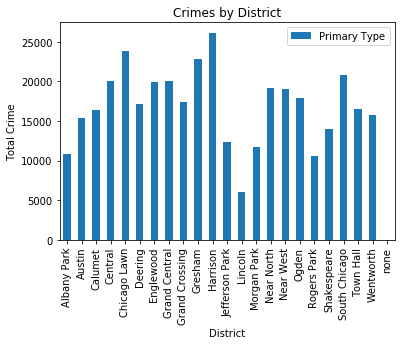

In [156]:
#Create a Bar Chart for all crimes per districts
district_table = district_groupby.plot(kind="bar", title="Crimes by District")
district_table.set_xlabel("District")
district_table.set_ylabel("Total Crime")

plt.show()

In [157]:
# Groupby District
new_data = crime_df_districts.groupby(["District","Primary Type"]).count()
new_data.head(2)

Empty DataFrame
Columns: []
Index: [(Albany Park, BATTERY), (Albany Park, CRIMINAL DAMAGE)]

In [158]:
#List of crimes based on combining similar offense.
Crime_Cat_df = ["THEFT","BATTERY","CRIMINAL DAMAGE","OTHER OFFENSE","NARCOTICS","PUBLIC PEACE VIOLATION","SEX OFFENSE"]
Crime_Cat_df

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'OTHER OFFENSE',
 'NARCOTICS',
 'PUBLIC PEACE VIOLATION',
 'SEX OFFENSE']

In [159]:
#Count of crimes total
type_count = crime_df_districts["Primary Type"].value_counts()
type_count

THEFT                     138253
BATTERY                   103824
CRIMINAL DAMAGE            59958
OTHER OFFENSE              44751
NARCOTICS                  18123
PUBLIC PEACE VIOLATION      6556
SEX OFFENSE                 2412
Name: Primary Type, dtype: int64

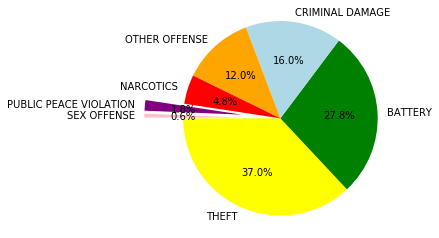

In [160]:
#pie chart showing the persenatge of total crimes again crime type from

explode = (0,0,0,0,0,0.4,0.4)
colors = ["yellow","green","lightblue","orange","red","purple","pink"]

plt.pie(type_count, explode=explode, labels=Crime_Cat_df, colors=colors,
      autopct="%1.1f%%", shadow=False, startangle=180)
plt.savefig("Crim_Cat_df.png")
plt.axis("equal")
plt.show()

In [161]:
Heat_Map = crime_df[crime_df["Primary Type"] == "THEFT"]
Heat_Map.head(2)

,Date,Time,Primary Type,Description,Location Description,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
5,6/25/2017,7:00:00 PM,THEFT,ARMED: HANDGUN,SMALL RETAIL STORE,True,False,Calumet,49,2017,41.707062,-87.631483
6,9/6/2017,1:30:00 PM,THEFT,OVER $500,OTHER,True,False,Ogden,30,2017,41.844510,-87.705519


In [162]:
# new table showing crimes in districts
crime_df_districts_new = Heat_Map[["District", "Primary Type"]]
crime_df_districts_new.head(2)

,District,Primary Type
5,Calumet,THEFT
6,Ogden,THEFT


In [163]:
district_groupby_new = crime_df_districts_new.groupby(['District']).count()
district_groupby_new.head(25)

,Primary Type
District,
Albany Park,4810
Austin,3828
Calumet,4472
Central,11434
Chicago Lawn,8930
Deering,5746
Englewood,5144
Grand Central,7135
Grand Crossing,5435


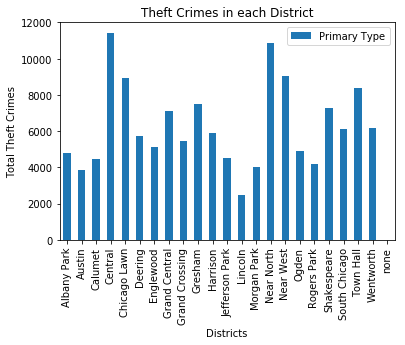

In [164]:
#Create a Bar Chart for all theft crimes per districts
table = district_groupby_new.plot(kind="bar", title="Theft Crimes in each District")
table.set_xlabel("Districts")
table.set_ylabel("Total Theft Crimes")
#plt.legend(handles=[THEFT], loc="best")
plt.show()

In [165]:
from stats import median
import numpy as np

In [166]:
# list of districts
Districts = ["Albany Park","Austin","Calumet", "Central","Chicago Lawn", "Deering","Englewood", "Grand Central","Grand Crossing",
 "Gresham", "Harrison","Jefferson Park", "Lincoln","Morgan Park", "Near North","Near West", "Ogden","Rogers Park",
 "Shakespeare","South Chicago", "Town Hall", "Wentworth", "none"]

In [167]:
Theft = np.array([4810,3828,4472,11434,8930,5746,5144,7135,5435,7525,5888,4535,2452,4023,10848,9031,4896,4189,7280,6130,8369,6152,1])

In [168]:
mid = median(Theft)
mid

5746

In [169]:
q1 = np.percentile(Theft, 25)
q3 = np.percentile(Theft,75)

In [170]:
# Print the quartiles
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")

Q1 is 4503.5
Q3 is 7402.5


In [171]:
# Calculate the interquartile range
iqr = (q3 - q1)
print("interquartile range:", iqr)

interquartile range: 2899.0


In [172]:
# Find lower boundary
# Q1 - 1.5 * IQR
lower_boundary = q1 - (1.5 * iqr)
lower_boundary

155.0

In [173]:
# Find upper boundary
# Q3 + 1.5 * IQR
upper_boundary = q3 + (1.5 * iqr)
upper_boundary

11751.0

In [174]:
# Check for any lower outliers
Theft[Theft <= lower_boundary]

array([1])

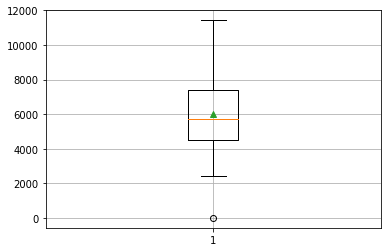

In [175]:
# Create box plot
plt.boxplot(Theft, showmeans=True)
plt.grid()
plt.show()

In [176]:
New_Theft = [4810,3828,4472,11434,8930,5746,5144,7135,5435,7525,5888,4535,2452,4023,10848,9031,4896,4189,7280,6130,8369,6152,1]

In [177]:
Districts = ["Albany Park","Austin","Calumet", "Central","Chicago Lawn", "Deering","Englewood", "Grand Central","Grand Crossing",
 "Gresham", "Harrison","Jefferson Park", "Lincoln","Morgan Park", "Near North","Near West", "Ogden","Rogers Park",
 "Shakespeare","South Chicago", "Town Hall", "Wentworth", "none"]

In [179]:
Latitude = [41.88465,41.80854,41.75846,41.75305,41.70706,41.74336,41.75957,41.78703,41.81533,41.84451,41.88549,41.89581,41.92102,
           41.87947,41.98105183,41.97806,41.89318,41.93844,41.97395,41.71272,42.01229,41.93858,41.96801]

In [180]:
Longitude = [-87.6279,-87.6212,-87.6122,-87.5638,-87.6315,-87.6147,-87.6552,-87.7095,-87.6423,-87.7055,-87.7264,-87.6832,
           -87.6973,-87.7482,-87.83965884,-87.7087,-87.6346,-87.6589,-87.6549,-87.6818,-87.6997,-87.7658,-87.8188]

In [181]:
gmaps.configure(api_key=gkey)
from us import states
import gmaps
from config_g import gkey
import pandas as pd
import matplotlib.pyplot as plt

NameError: name 'gkey' is not defined

In [182]:
#read into the csv
crime_df_lat_log = pd.read_csv("Raw_Data.zip/Raw_Data/Lat_Log.csv")
crime_df_lat_log.head(1)

FileNotFoundError: File b'Raw_Data/Lat_Log.csv' does not exist

In [183]:
# Store 'Lat' and 'Lng' into  locations
locations = crime_df_lat_log[["Latitude", "Longitude"]].astype(float)

# Convert Poverty Rate to float and store
# HINT: be sure to handle NaN values
poverty_rate = crime_df_lat_log["Theft Crime"].astype(float)

NameError: name 'crime_df_lat_log' is not defined

In [184]:
locations = locations.rename(columns={"Latitude": "Lat", "Longitude":"Lng"})
locations.head(2)

NameError: name 'locations' is not defined

In [185]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate,
                                dissipating=False, max_intensity=100,
                                point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
# heat_layer.dissipating = False
# heat_layer.max_intensity = 100
# heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig

NameError: name 'locations' is not defined